# SSP Models tutorial

In [6]:
from milespy import SSPLibrary
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

The level of verbosity of `milespy` can be changed using the `logging` module, setting the level to either `WARNING`, `INFO` or `DEBUG`.

In [7]:
import logging
logger = logging.getLogger("milespy")
# logger.setLevel(logging.DEBUG)

## Initialize

In [8]:
miles = SSPLibrary(
    source="MILES_SSP",
    version="9.1",
    imf_type="bi",
    isochrone="P",
)

### Generate SSP

1. Directly from parameters (interpolated)

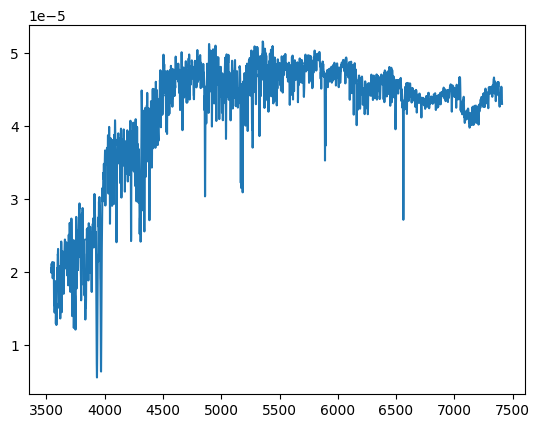

In [9]:
spec = miles.interpolate(
    age=5.7*u.Gyr, met=-0.45*u.dex, imf_slope=1.3,
)
plt.plot(spec.spectral_axis, spec.flux)
plt.show()

2. Given a range of values

In [24]:
spec2 = miles.in_range(
    age_lims=[7.0, 10.0]<<u.Gyr, met_lims=[-0.1, 0.5]<<u.dex
)
spec2.nspec

112

In [25]:
np.unique(spec2.age)

<Quantity [ 7.0795,  7.9433,  8.9125, 10.    ] Gyr>

In [26]:
np.unique(spec2.met)

<Quantity [0.  , 0.22] dex>

3.  From a list of parameters

In [27]:
spec3 = miles.in_list(
    age=[0.2512, 0.0708, 1.4125] << u.Gyr,
    met=[0.22, 0.0, -1.71] << u.dex,
    imf_slope=np.array([1.3, 1.3, 1.3]),
)
spec3.age

<Quantity [0.2512, 0.0708, 1.4125] Gyr>

### Analyze the spectra

You can load filters from the database and compute derived quantities from those and the SSP spectra

In [28]:
import milespy.filter as flib
filts = flib.get( flib.search("sloan") )
outmls = spec.mass_to_light(filters=filts, mass_in="star+remn")

print(
    spec.age,
    spec.met,
    spec.Mass_star_remn,
    outmls["SLOAN_SDSS.u"],
    outmls["SLOAN_SDSS.g"],
    outmls["SLOAN_SDSS.r"],
    outmls["SLOAN_SDSS.i"],
    outmls["SLOAN_SDSS.z"],
)

milespy.magnitudes: Filter SLOAN_SDSS.i [6430.0,8630.0] is outside ofthe spectral range [3540.5, 7409.6]
milespy.magnitudes: Filter SLOAN_SDSS.u [2980.0,4130.0] is outside ofthe spectral range [3540.5, 7409.6]
milespy.magnitudes: Filter SLOAN_SDSS.z [7730.0,11230.0] is outside ofthe spectral range [3540.5, 7409.6]


5.7 Gyr -0.45 dex 0.6223571750923741 nan 1.9871261886373415 1.6757822396390838 nan nan


## Compute mags

Note that we can use fancy regex for selecting the filters!

In [29]:
import milespy.filter as flib
filts = flib.get( flib.search("sdss.(r|g)") )
outmags = spec.magnitudes(
    filters=filts, zeropoint="AB"
)
print(outmags)

{'SLOAN_SDSS.g': 6.401271533249293, 'SLOAN_SDSS.r': 5.723690182070875}


They can be saved as astropy tables using `write`. By default, the `basic` format is used and rather than saving to a file it prints the output to `stdout`.
This can be changed with the `format` and `output` parameters, respectively.

In [30]:
outmags.write(format='fixed_width')

|      SLOAN_SDSS.g |      SLOAN_SDSS.r |
| 6.401271533249293 | 5.723690182070875 |


## Compute LS indices

In [31]:
import milespy.ls_indices as lslib 
names = lslib.search("^H.*")
print(names)
indeces = lslib.get(names)

outls = spec.line_strength(indeces)
print(outls['Halpha'])

['H10Fe', 'H_K', 'HdA', 'HdF', 'HgA', 'HgF', 'Hg_sigma_275', 'Hg_sigma_200', 'Hg_sigma_125', 'Hg_sigma_130', 'Hbeta_o', 'Hbeta', 'Halpha', 'Ha_Gregg94']
[2.41603984]


## Compute mass-to-light ratios

In [34]:
import milespy.filter as flib
filts = flib.get( flib.search("sdss.r") )
outmls = spec.mass_to_light(filters=filts, mass_in="star+remn")
print(outmls)

{'SLOAN_SDSS.r': 1.6757822396390838}
